In [2]:
from PIL import Image
import requests
from transformers import AutoProcessor, AutoModel
import torch
import matplotlib.pyplot as plt
import numpy as np

model = AutoModel.from_pretrained("google/siglip-base-patch16-224")
processor = AutoProcessor.from_pretrained("google/siglip-base-patch16-224")

url = "https://okl.scene7.com/is/image/OKL/022517%5FRooms%5F5?wid=1066&op_sharpen=1"
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
plt.show()

texts = ["a bedroom with distinct regions", "a bedroom without distinct regions", "a bedroom with good traffic flow", "a bedroom with bad traffic flow", 
         "A bedroom with a balanced layout", "A bedroom without a balanced layout", "A good layout for a bedroom", "A bad layout for a bedroom",
         "A bedroom with good feng shui", "A bedroom with bad feng shui",
         "A bedroom with some objects blocking paths", "A bedroom with no objects blocking paths", "A bedroom that uses space well", "A bedroom that wastes space",
         "A bedroom with wide paths", "A bedroom with narrow paths"]

# important: we pass `padding=max_length` since the model was trained with this

inputs = processor(text=texts, images=image, padding="max_length", return_tensors="pt")

with torch.no_grad():

    outputs = model(**inputs)

logits_per_image = outputs.logits_per_image

probs = torch.sigmoid(logits_per_image) # these are the probabilities

for i in range(len(texts)//2):
    print(f"{probs[0][2*i]:.1%} that the image is '{texts[2*i]}'")
    print(f"{probs[0][2*i + 1]:.1%} that the image is '{texts[2*i + 1]}'")
    print("")


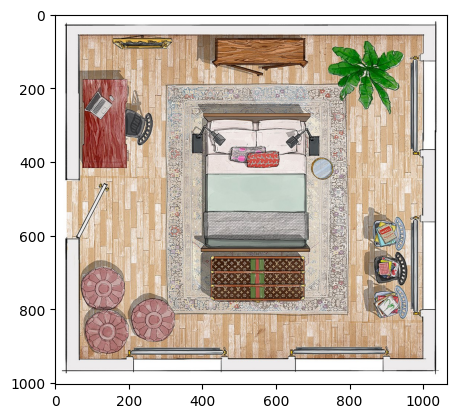

24.6% that the image is 'a bedroom with distinct regions'
23.5% that the image is 'a bedroom without distinct regions'

12.0% that the image is 'a bedroom with good traffic flow'
0.7% that the image is 'a bedroom with bad traffic flow'

55.7% that the image is 'A bedroom with a balanced layout'
56.3% that the image is 'A bedroom without a balanced layout'

83.0% that the image is 'A good layout for a bedroom'
81.9% that the image is 'A bad layout for a bedroom'

9.8% that the image is 'A bedroom with good feng shui'
11.8% that the image is 'A bedroom with bad feng shui'

11.8% that the image is 'A bedroom with some objects blocking paths'
10.4% that the image is 'A bedroom with no objects blocking paths'

4.6% that the image is 'A bedroom that uses space well'
2.2% that the image is 'A bedroom that wastes space'

2.6% that the image is 'A bedroom with wide paths'
1.5% that the image is 'A bedroom with narrow paths'



In [3]:
url = "https://okl.scene7.com/is/image/OKL/022517%5FRooms%5F6?wid=1066&op_sharpen=1"

image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
plt.show()

# important: we pass `padding=max_length` since the model was trained with this
inputs = processor(text=texts, images=image, padding="max_length", return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

logits_per_image = outputs.logits_per_image

probs = torch.sigmoid(logits_per_image) # these are the probabilities
for i in range(len(texts)//2):
    print(f"{probs[0][2*i]:.1%} that the image is '{texts[2*i]}'")
    print(f"{probs[0][2*i + 1]:.1%} that the image is '{texts[2*i + 1]}'")
    print("")

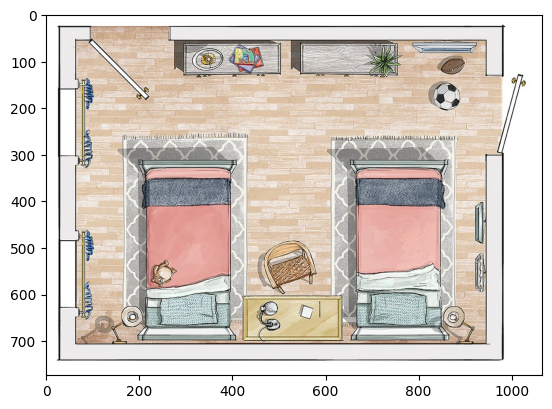

8.1% that the image is 'a bedroom with distinct regions'
10.5% that the image is 'a bedroom without distinct regions'

6.1% that the image is 'a bedroom with good traffic flow'
0.7% that the image is 'a bedroom with bad traffic flow'

20.1% that the image is 'A bedroom with a balanced layout'
24.6% that the image is 'A bedroom without a balanced layout'

53.6% that the image is 'A good layout for a bedroom'
47.0% that the image is 'A bad layout for a bedroom'

1.2% that the image is 'A bedroom with good feng shui'
1.7% that the image is 'A bedroom with bad feng shui'

1.7% that the image is 'A bedroom with some objects blocking paths'
4.1% that the image is 'A bedroom with no objects blocking paths'

2.6% that the image is 'A bedroom that uses space well'
1.3% that the image is 'A bedroom that wastes space'

0.5% that the image is 'A bedroom with wide paths'
0.9% that the image is 'A bedroom with narrow paths'



In [4]:
url = "https://okl.scene7.com/is/image/OKL/022517%5FRooms%5F2?wid=1066&op_sharpen=1"

image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
plt.show()
# important: we pass `padding=max_length` since the model was trained with this

inputs = processor(text=texts, images=image, padding="max_length", return_tensors="pt")

with torch.no_grad():

    outputs = model(**inputs)

logits_per_image = outputs.logits_per_image

probs = torch.sigmoid(logits_per_image) # these are the probabilities

for i in range(len(texts)//2):
    print(f"{probs[0][2*i]:.1%} that the image is '{texts[2*i]}'")
    print(f"{probs[0][2*i + 1]:.1%} that the image is '{texts[2*i + 1]}'")
    print("")

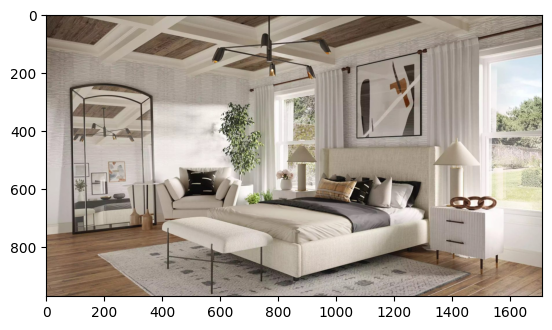

19.6% that the image is 'a bedroom with distinct regions'
6.7% that the image is 'a bedroom without distinct regions'

9.8% that the image is 'a bedroom with good traffic flow'
2.6% that the image is 'a bedroom with bad traffic flow'

29.4% that the image is 'A bedroom with a balanced layout'
8.9% that the image is 'A bedroom without a balanced layout'

5.6% that the image is 'A good layout for a bedroom'
0.9% that the image is 'A bad layout for a bedroom'

5.9% that the image is 'A bedroom with good feng shui'
3.1% that the image is 'A bedroom with bad feng shui'

5.2% that the image is 'A bedroom with some objects blocking paths'
10.8% that the image is 'A bedroom with no objects blocking paths'

5.8% that the image is 'A bedroom that uses space well'
2.3% that the image is 'A bedroom that wastes space'

6.8% that the image is 'A bedroom with wide paths'
4.1% that the image is 'A bedroom with narrow paths'



In [5]:
url = "https://havenly.com/blog/wp-content/uploads/2022/10/Bedroom-Layout-1-1710x970.jpg"

image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
plt.show()

# important: we pass `padding=max_length` since the model was trained with this

inputs = processor(text=texts, images=image, padding="max_length", return_tensors="pt")

with torch.no_grad():

    outputs = model(**inputs)

logits_per_image = outputs.logits_per_image

probs = torch.sigmoid(logits_per_image) # these are the probabilities

for i in range(len(texts)//2):
    print(f"{probs[0][2*i]:.1%} that the image is '{texts[2*i]}'")
    print(f"{probs[0][2*i + 1]:.1%} that the image is '{texts[2*i + 1]}'")
    print("")

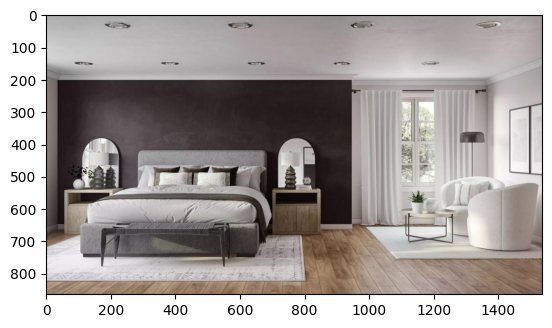

16.2% that the image is 'a bedroom with distinct regions'
12.8% that the image is 'a bedroom without distinct regions'

16.2% that the image is 'a bedroom with good traffic flow'
6.3% that the image is 'a bedroom with bad traffic flow'

18.7% that the image is 'A bedroom with a balanced layout'
10.4% that the image is 'A bedroom without a balanced layout'

10.2% that the image is 'A good layout for a bedroom'
2.2% that the image is 'A bad layout for a bedroom'

9.0% that the image is 'A bedroom with good feng shui'
7.8% that the image is 'A bedroom with bad feng shui'

3.4% that the image is 'A bedroom with some objects blocking paths'
10.9% that the image is 'A bedroom with no objects blocking paths'

6.2% that the image is 'A bedroom that uses space well'
5.0% that the image is 'A bedroom that wastes space'

6.0% that the image is 'A bedroom with wide paths'
1.5% that the image is 'A bedroom with narrow paths'



In [6]:
url = "https://havenly.com/blog/wp-content/uploads/2022/10/Bedroom-Layout-2-1536x864.jpg"

image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
plt.show()

# important: we pass `padding=max_length` since the model was trained with this

inputs = processor(text=texts, images=image, padding="max_length", return_tensors="pt")

with torch.no_grad():

    outputs = model(**inputs)

logits_per_image = outputs.logits_per_image

probs = torch.sigmoid(logits_per_image) # these are the probabilities

for i in range(len(texts)//2):
    print(f"{probs[0][2*i]:.1%} that the image is '{texts[2*i]}'")
    print(f"{probs[0][2*i + 1]:.1%} that the image is '{texts[2*i + 1]}'")
    print("")

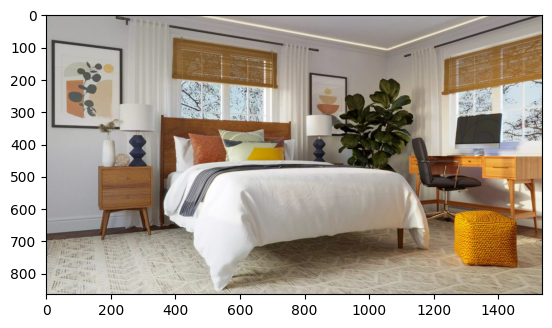

29.5% that the image is 'a bedroom with distinct regions'
13.5% that the image is 'a bedroom without distinct regions'

26.5% that the image is 'a bedroom with good traffic flow'
7.8% that the image is 'a bedroom with bad traffic flow'

14.4% that the image is 'A bedroom with a balanced layout'
8.9% that the image is 'A bedroom without a balanced layout'

8.7% that the image is 'A good layout for a bedroom'
3.3% that the image is 'A bad layout for a bedroom'

5.7% that the image is 'A bedroom with good feng shui'
5.9% that the image is 'A bedroom with bad feng shui'

11.7% that the image is 'A bedroom with some objects blocking paths'
15.3% that the image is 'A bedroom with no objects blocking paths'

7.1% that the image is 'A bedroom that uses space well'
6.8% that the image is 'A bedroom that wastes space'

2.7% that the image is 'A bedroom with wide paths'
1.7% that the image is 'A bedroom with narrow paths'



In [7]:
url = "https://havenly.com/blog/wp-content/uploads/2022/10/Bedroom-Layout-7-1536x864.jpg"

image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
plt.show()

# important: we pass `padding=max_length` since the model was trained with this

inputs = processor(text=texts, images=image, padding="max_length", return_tensors="pt")

with torch.no_grad():

    outputs = model(**inputs)

logits_per_image = outputs.logits_per_image

probs = torch.sigmoid(logits_per_image) # these are the probabilities

for i in range(len(texts)//2):
    print(f"{probs[0][2*i]:.1%} that the image is '{texts[2*i]}'")
    print(f"{probs[0][2*i + 1]:.1%} that the image is '{texts[2*i + 1]}'")
    print("")

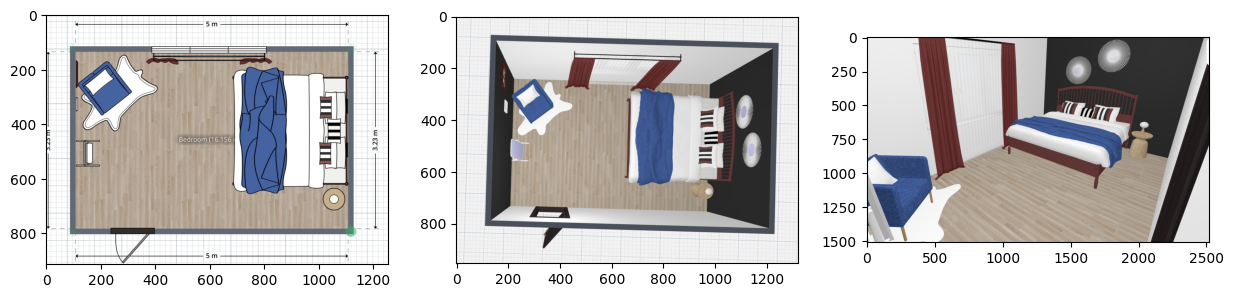

Results for image0
'a good layout for a bedroom: 89.5%' 'a bad layout for a bedroom': 79.9% 'a layout for a bedroom': 80.7%

[0.29826024 0.26618785 0.26904371]
Results for image1
'a good layout for a bedroom: 82.1%' 'a bad layout for a bedroom': 77.9% 'a layout for a bedroom': 84.6%

[0.5720326  0.52576569 0.55091256]
Results for image2
'a good layout for a bedroom: 8.8%' 'a bad layout for a bedroom': 8.7% 'a layout for a bedroom': 20.3%

[0.60143059 0.55476754 0.61850914]


In [8]:
string = "/Users/gabriellelittlefair/Documents/GitHub/MSc Project/Images/"
image1 = Image.open(string + "td/top_down1.png").convert('RGB')
image2 = Image.open(string + "3dtd/3Dtd1.png").convert('RGB')
image3 = Image.open(string + "angled/angled1.png").convert('RGB')

fig, axes  = plt.subplots(1, 3, figsize = (15, 5))
axes[0].imshow(image1)
axes[1].imshow(image2)
axes[2].imshow(image3)
plt.show()


texts = ["a good layout for a bedroom", "a bad layout for a bedroom", "a layout for a bedroom"]

images = [image1, image2, image3]
prob_sum = np.zeros(3)
for i in range(3):
    inputs = processor(text=texts, images=images[i], padding="max_length", return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = torch.sigmoid(logits_per_image) # these are the probabilities
    prob_sum += probs.numpy()[0]/3
    print(f"Results for image{i}")
    for j in range(len(texts)//2):
        print(f"'{texts[2*j]}: {probs[0][2*j]:.1%}'", f"'{texts[2*j + 1]}': {probs[0][2*j + 1]:.1%}", f"'{texts[2*j + 2]}': {probs[0][2*j + 2]:.1%}")
        print("")
    
    print(f"{prob_sum}")

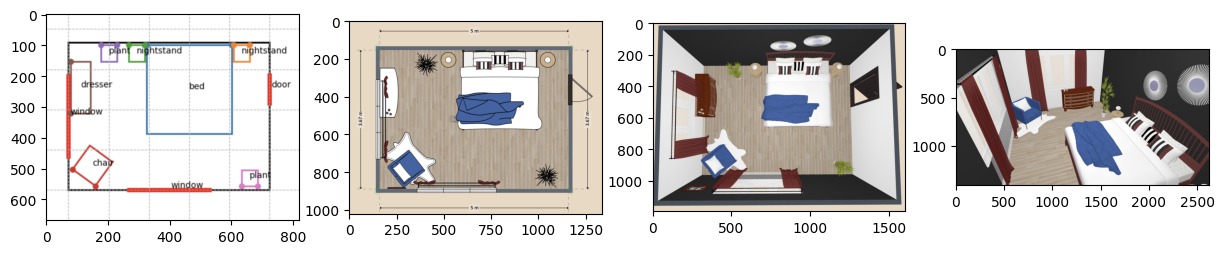

Results for image0
'a good layout for a bedroom: 75.5%' 'a bad layout for a bedroom': 95.7% 'a layout for a bedroom': 87.6%

[0.18863244 0.23916112 0.21889076]
Results for image1
'a good layout for a bedroom: 90.3%' 'a bad layout for a bedroom': 78.3% 'a layout for a bedroom': 90.5%

[0.41440624 0.43488374 0.44508138]
Results for image2
'a good layout for a bedroom: 82.6%' 'a bad layout for a bedroom': 71.9% 'a layout for a bedroom': 82.3%

[0.6209529  0.61454873 0.65094213]
Results for image3
'a good layout for a bedroom: 31.1%' 'a bad layout for a bedroom': 26.1% 'a layout for a bedroom': 48.0%

[0.69873126 0.67969914 0.7708312 ]


In [9]:
image1 = Image.open(string + "bbox/bbox2.png").convert('RGB')
image2 = Image.open(string + "td/top_down2.png").convert('RGB')
image3 = Image.open(string + "3dtd/3Dtd2.png").convert('RGB')
image4 = Image.open(string + "angled/angled2.png").convert('RGB')

fig, axes  = plt.subplots(1, 4, figsize = (15, 5))
axes[0].imshow(image1)
axes[1].imshow(image2)
axes[2].imshow(image3)
axes[3].imshow(image4)
plt.show()

images = [image1, image2, image3, image4]
prob_sum = np.zeros(3)
for i in range(4):
    inputs = processor(text=texts, images=images[i], padding="max_length", return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = torch.sigmoid(logits_per_image) # these are the probabilities
    prob_sum += probs.numpy()[0]/4
    print(f"Results for image{i}")
    for j in range(len(texts)//2):
        print(f"'{texts[2*j]}: {probs[0][2*j]:.1%}'", f"'{texts[2*j + 1]}': {probs[0][2*j + 1]:.1%}", f"'{texts[2*j + 2]}': {probs[0][2*j + 2]:.1%}")
        print("")
    
    print(f"{prob_sum}")

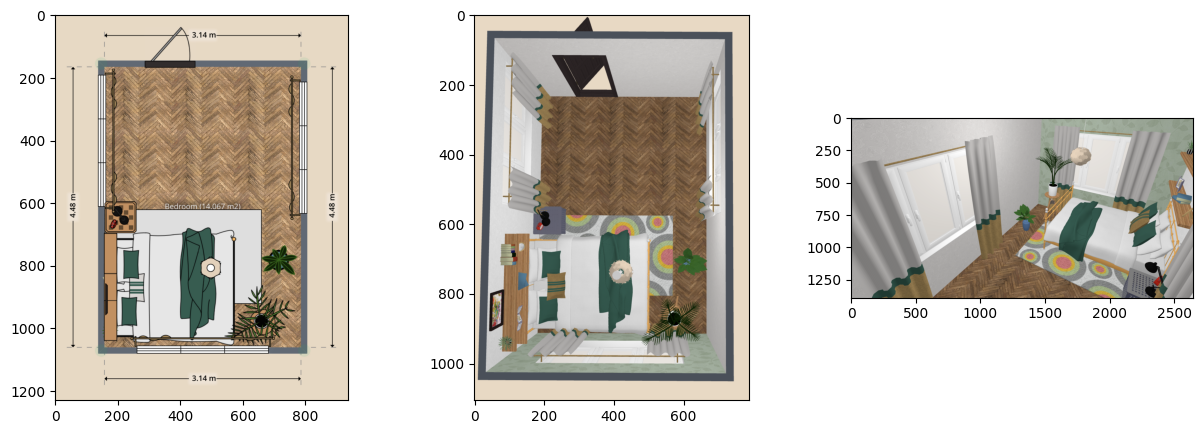

Results for image0
'a good layout for a bedroom: 73.2%' 'a bad layout for a bedroom': 62.4% 'a layout for a bedroom': 73.0%

[0.2439469  0.20804529 0.24347515]
Results for image1
'a good layout for a bedroom: 51.8%' 'a bad layout for a bedroom': 74.2% 'a layout for a bedroom': 77.6%

[0.4164606  0.45540272 0.50217722]
Results for image2
'a good layout for a bedroom: 20.0%' 'a bad layout for a bedroom': 25.2% 'a layout for a bedroom': 43.9%

[0.48318858 0.53931786 0.648591  ]


In [10]:
image1 = Image.open(string + "td/top_down3.png").convert('RGB')
image2 = Image.open(string + "3dtd/3Dtd3.png").convert('RGB')
image3 = Image.open(string + "angled/angled3.png").convert('RGB')

fig, axes  = plt.subplots(1, 3, figsize = (15, 5))
axes[0].imshow(image1)
axes[1].imshow(image2)
axes[2].imshow(image3)
plt.show()

texts = ["a good layout for a bedroom", "a bad layout for a bedroom", "a layout for a bedroom"]
# important: we pass `padding=max_length` since the model was trained with this

images = [image1, image2, image3]
prob_sum = np.zeros(3)
for i in range(3):
    inputs = processor(text=texts, images=images[i], padding="max_length", return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = torch.sigmoid(logits_per_image) # these are the probabilities
    prob_sum += probs.numpy()[0]/3
    print(f"Results for image{i}")
    for j in range(len(texts)//2):
        print(f"'{texts[2*j]}: {probs[0][2*j]:.1%}'", f"'{texts[2*j + 1]}': {probs[0][2*j + 1]:.1%}", f"'{texts[2*j + 2]}': {probs[0][2*j + 2]:.1%}")
        print("")
    
    print(f"{prob_sum}")

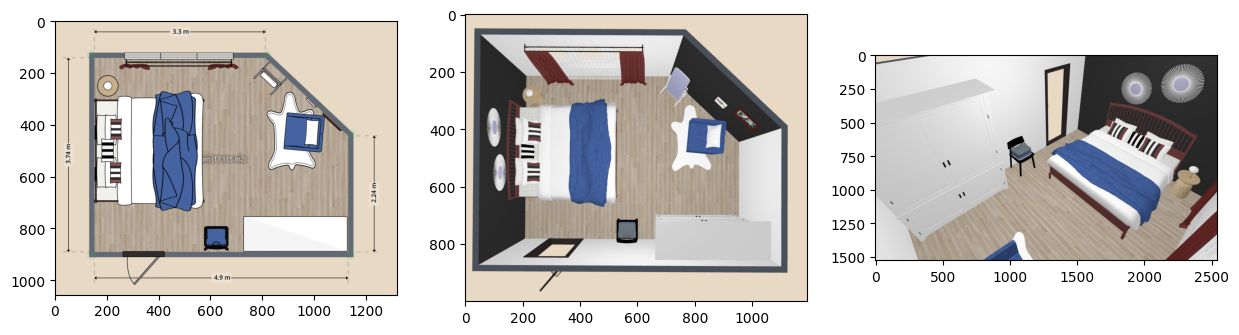

Results for image0
'a good layout for a bedroom: 86.7%' 'a bad layout for a bedroom': 84.8% 'a layout for a bedroom': 85.5%

[0.2888858  0.28271064 0.28502795]
Results for image1
'a good layout for a bedroom: 72.4%' 'a bad layout for a bedroom': 62.2% 'a layout for a bedroom': 76.5%

[0.53024049 0.48994319 0.54009229]
Results for image2
'a good layout for a bedroom: 21.5%' 'a bad layout for a bedroom': 13.8% 'a layout for a bedroom': 38.7%

[0.60186069 0.53579077 0.66918004]


In [11]:
image1 = Image.open(string + "td/top_down4.png").convert('RGB')
image2 = Image.open(string + "3dtd/3Dtd4.png").convert('RGB')
image3 = Image.open(string + "angled/angled4.png").convert('RGB')

fig, axes  = plt.subplots(1, 3, figsize = (15, 5))
axes[0].imshow(image1)
axes[1].imshow(image2)
axes[2].imshow(image3)
plt.show()

texts = ["a good layout for a bedroom", "a bad layout for a bedroom", "a layout for a bedroom"]
# important: we pass `padding=max_length` since the model was trained with this

images = [image1, image2, image3]
prob_sum = np.zeros(3)
for i in range(3):
    inputs = processor(text=texts, images=images[i], padding="max_length", return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = torch.sigmoid(logits_per_image) # these are the probabilities
    prob_sum += probs.numpy()[0]/3
    print(f"Results for image{i}")
    for j in range(len(texts)//2):
        print(f"'{texts[2*j]}: {probs[0][2*j]:.1%}'", f"'{texts[2*j + 1]}': {probs[0][2*j + 1]:.1%}", f"'{texts[2*j + 2]}': {probs[0][2*j + 2]:.1%}")
        print("")
    
    print(f"{prob_sum}")

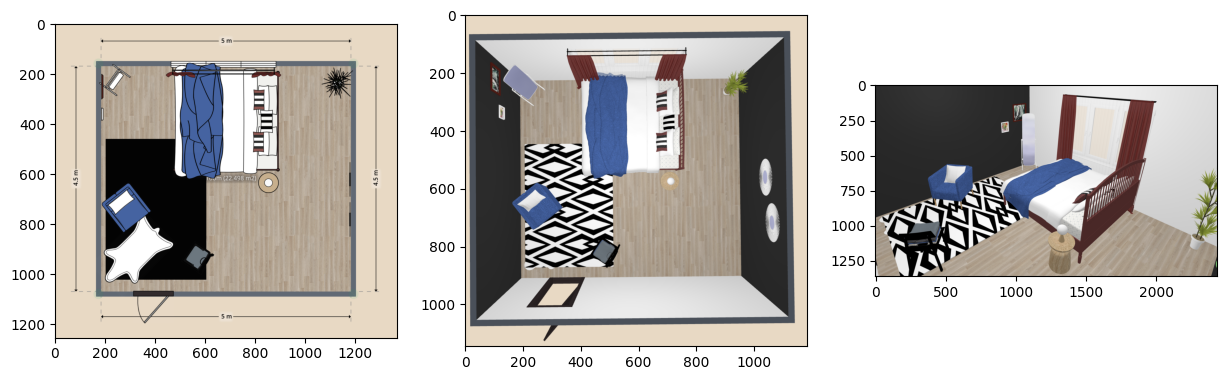

Results for image0
'a good layout for a bedroom: 87.8%' 'a bad layout for a bedroom': 80.5% 'a layout for a bedroom': 89.2%

[0.29266694 0.26823434 0.29724881]
Results for image1
'a bedroom with a good layout: 46.1%' 'a bedroom with a bad layout': 38.6% 'a bedroom': 0.2%

[0.44625674 0.39691181 0.29791818]
Results for image2
'a bedroom with a good layout: 5.0%' 'a bedroom with a bad layout': 8.7% 'a bedroom': 0.3%

[0.46288701 0.42597676 0.29904961]


In [13]:
image1 = Image.open(string + "td/top_down6.png").convert('RGB')
image2 = Image.open(string + "3dtd/3Dtd6.png").convert('RGB')
image3 = Image.open(string + "angled/angled6.png").convert('RGB')

fig, axes  = plt.subplots(1, 3, figsize = (15, 5))
axes[0].imshow(image1)
axes[1].imshow(image2)
axes[2].imshow(image3)
plt.show()

#texts = ["a good layout for a bedroom", "a bad layout for a bedroom", "a layout for a bedroom"]
texts = [["a good layout for a bedroom", "a bad layout for a bedroom", "a layout for a bedroom"], 
        ["a bedroom with a good layout", "a bedroom with a bad layout", "a bedroom"], 
        ["a bedroom with a good layout", "a bedroom with a bad layout", "a bedroom"]]
# important: we pass `padding=max_length` since the model was trained with this

images = [image1, image2, image3]
prob_sum = np.zeros(3)
for i in range(3):
    inputs = processor(text=texts[i], images=images[i], padding="max_length", return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = torch.sigmoid(logits_per_image) # these are the probabilities
    prob_sum += probs.numpy()[0]/3
    print(f"Results for image{i}")
    for j in range(len(texts)//2):
        print(f"'{texts[i][2*j]}: {probs[0][2*j]:.1%}'", f"'{texts[i][2*j + 1]}': {probs[0][2*j + 1]:.1%}", f"'{texts[i][2*j + 2]}': {probs[0][2*j + 2]:.1%}")
        print("")
    
    print(f"{prob_sum}")

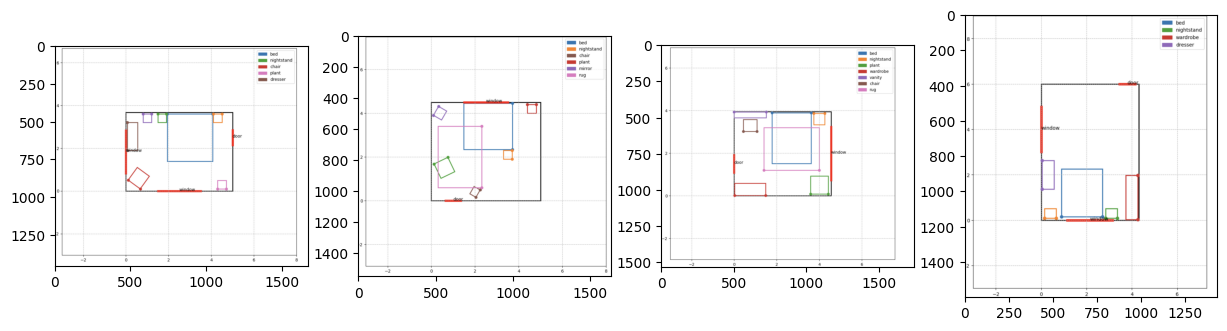

Results for image0
'a good layout for a bedroom: 79.3%' 'a bad layout for a bedroom': 95.4% 'a layout for a bedroom': 81.4%

[0.19826789 0.23846391 0.20347479]
Results for image1
'a good layout for a bedroom: 3.9%' 'a bad layout for a bedroom': 30.8% 'a layout for a bedroom': 5.1%

[0.20801036 0.31554589 0.21628363]
Results for image2
'a good layout for a bedroom: 3.4%' 'a bad layout for a bedroom': 22.7% 'a layout for a bedroom': 3.2%

[0.2166144  0.37239659 0.22427848]
Results for image3
'a good layout for a bedroom: 8.8%' 'a bad layout for a bedroom': 41.7% 'a layout for a bedroom': 12.9%

[0.2385971  0.476611   0.25640781]


In [14]:
image1 = Image.open("bb_1.png").convert('RGB')
image2 = Image.open("bb_2.png").convert('RGB')
image3 = Image.open("bb_3.png").convert('RGB')
image4 = Image.open("bb_4.png").convert('RGB')

texts = ["a good layout for a bedroom", "a bad layout for a bedroom", "a layout for a bedroom"]
# texts = [["a good layout for a bedroom", "a bad layout for a bedroom", "a layout for a bedroom"], 
#         ["a bedroom with a good layout", "a bedroom with a bad layout", "a bedroom"], 
#         ["a bedroom with a good layout", "a bedroom with a bad layout", "a bedroom"]]
# important: we pass `padding=max_length` since the model was trained with this

fig, axes  = plt.subplots(1, 4, figsize = (15, 5))
axes[0].imshow(image1)
axes[1].imshow(image2)
axes[2].imshow(image3)
axes[3].imshow(image4)
plt.show()

images = [image1, image2, image3, image4]
prob_sum = np.zeros(3)
for i in range(4):
    inputs = processor(text=texts, images=images[i], padding="max_length", return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = torch.sigmoid(logits_per_image) # these are the probabilities
    prob_sum += probs.numpy()[0]/4
    print(f"Results for image{i}")
    for j in range(len(texts)//2):
        print(f"'{texts[2*j]}: {probs[0][2*j]:.1%}'", f"'{texts[2*j + 1]}': {probs[0][2*j + 1]:.1%}", f"'{texts[2*j + 2]}': {probs[0][2*j + 2]:.1%}")
        print("")
    
    print(f"{prob_sum}")

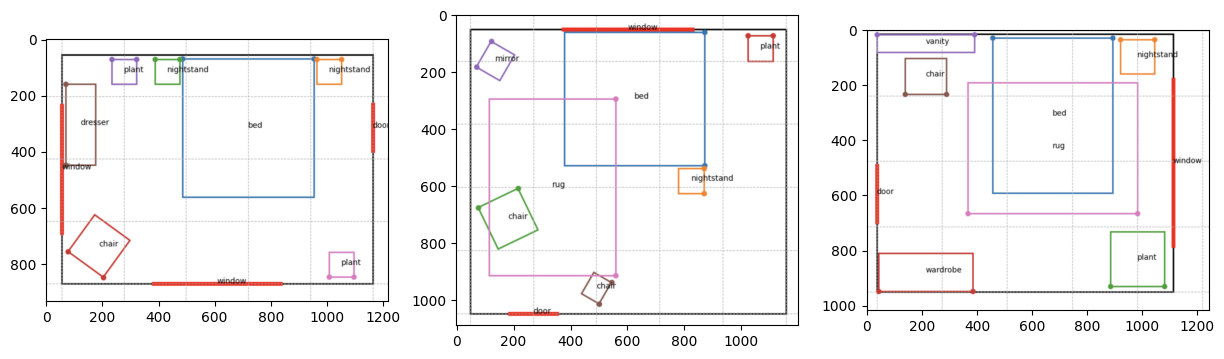

Results for image0
'a good layout for a bedroom: 90.2%' 'a bad layout for a bedroom': 98.3% 'a layout for a bedroom': 94.3%

[0.22545791 0.24566425 0.23571205]
Results for image1
'a good layout for a bedroom: 33.5%' 'a bad layout for a bedroom': 83.8% 'a layout for a bedroom': 57.4%

[0.30914184 0.45511712 0.37921107]
Results for image2
'a good layout for a bedroom: 61.3%' 'a bad layout for a bedroom': 88.2% 'a layout for a bedroom': 76.2%

[0.4624718  0.67558408 0.56975302]


In [3]:
string = "/Users/gabriellelittlefair/Desktop/Dataset/bounding_boxes/"
image1 = Image.open(string + "bb_1.png").convert('RGB')
image2 = Image.open(string + "bb_2.png").convert('RGB')
image3 = Image.open(string + "bb_3.png").convert('RGB')

texts = ["a good layout for a bedroom", "a bad layout for a bedroom", "a layout for a bedroom"]
# texts = [["a good layout for a bedroom", "a bad layout for a bedroom", "a layout for a bedroom"], 
#         ["a bedroom with a good layout", "a bedroom with a bad layout", "a bedroom"], 
#         ["a bedroom with a good layout", "a bedroom with a bad layout", "a bedroom"]]
# important: we pass `padding=max_length` since the model was trained with this

fig, axes  = plt.subplots(1, 3, figsize = (15, 5))
axes[0].imshow(image1)
axes[1].imshow(image2)
axes[2].imshow(image3)
plt.show()

images = [image1, image2, image3]
prob_sum = np.zeros(3)
for i in range(3):
    inputs = processor(text=texts, images=images[i], padding="max_length", return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = torch.sigmoid(logits_per_image) # these are the probabilities
    prob_sum += probs.numpy()[0]/4
    print(f"Results for image{i}")
    for j in range(len(texts)//2):
        print(f"'{texts[2*j]}: {probs[0][2*j]:.1%}'", f"'{texts[2*j + 1]}': {probs[0][2*j + 1]:.1%}", f"'{texts[2*j + 2]}': {probs[0][2*j + 2]:.1%}")
        print("")
    
    print(f"{prob_sum}")